In [35]:
import pandas as pd
import seaborn as sns

In [109]:
df = pd.read_csv('BlackFriday.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
del df['Product_Category_2']
del df['Product_Category_3']
# # Deleting the columns

In [8]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


## Analysing Gender

In [21]:
data = pd.DataFrame({'Ratio' :[len(df[df['Gender'] == 'M']),len(df[df['Gender'] == 'F'])]}, index=['Male','Female'])

<Axes: ylabel='Ratio'>

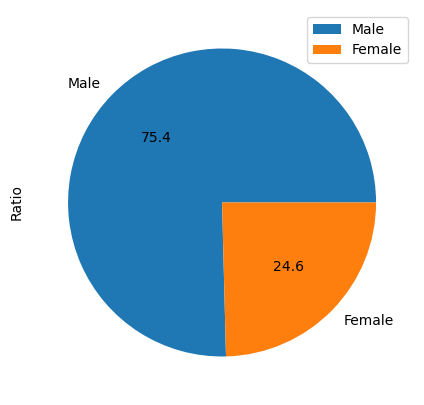

In [22]:
data.plot.pie(y = 'Ratio',figsize= (5,5),autopct = '%.1f')

#### It's clear from the pie chart that Ratio is 3:1 i.e. Male is having more purchasing power.

### Alternate way(kind of easy)

<Axes: title={'center': 'Gender Ratio'}>

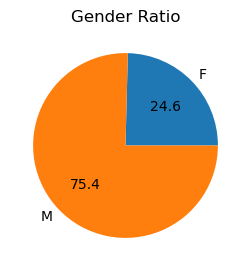

In [23]:
df.groupby(by = 'Gender').size().plot.pie(autopct = '%.1f',figsize = (3,3),title = 'Gender Ratio')

<Axes: title={'center': 'Gender Ratio'}, xlabel='Gender'>

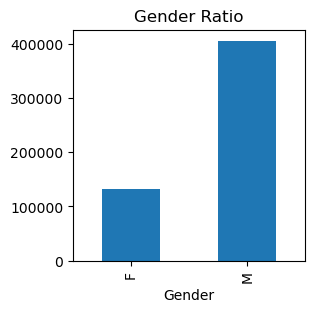

In [24]:
df.groupby(by = 'Gender').size().plot.bar(figsize = (3,3),title = 'Gender Ratio')

### Analysing how much money they have spend?

<Axes: ylabel='Purchase'>

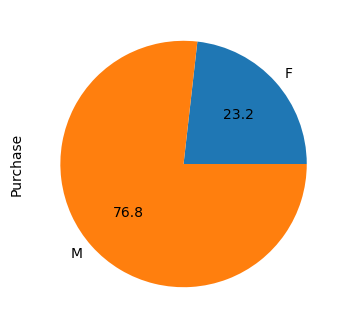

In [25]:
df.groupby('Gender')['Purchase'].sum().plot(kind = 'pie',autopct ='%.1f',figsize = (4,4))

#### Their avg spending

<Axes: ylabel='Purchase'>

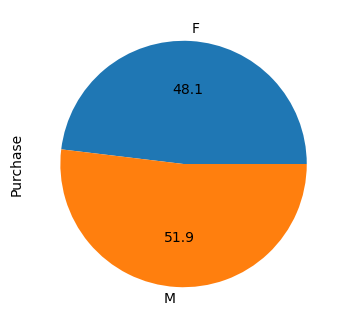

In [26]:
df.groupby('Gender')['Purchase'].mean().plot(kind = 'pie',autopct ='%.1f',figsize = (4,4))

#### Male and Female both are spending same amount of money per Product.

## Analysing Age and Maritial Status

<Axes: title={'center': 'Purchase Distributon by Age'}, xlabel='Age'>

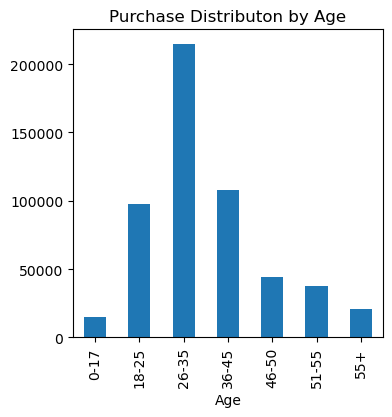

In [27]:
df.groupby('Age').size().plot(kind = 'bar',figsize = (4,4),title = 'Purchase Distributon by Age')

#### Most of the purchase(Products) is done by Age[18-45].
#### Products can be same.

#### How Many unique products are purchased by person?

In [28]:
lst = []
for i in df['Age'].unique():
    lst.append([i,df[df['Age'] == i]['Product_ID'].nunique()])
data = pd.DataFrame(lst,columns=['Age','Product'])
data

,Age,Product
0,0-17,2300
1,55+,2573
2,26-35,3419
3,46-50,3099
4,51-55,2877
5,36-45,3318
6,18-25,3213


<Axes: title={'center': 'Unique Product Purchase Distribution by Age'}, xlabel='Age'>

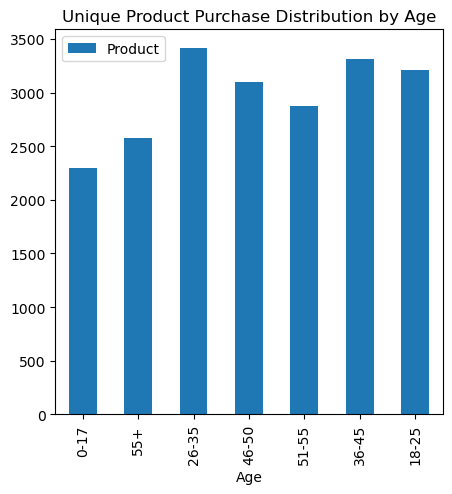

In [29]:
data.plot(kind ='bar', x = 'Age', figsize = (5,5),title ='Unique Product Purchase Distribution by Age')

#### Amount Spend By each Age Category

<Axes: title={'center': 'Amount Spend Distributon by Age'}, xlabel='Age'>

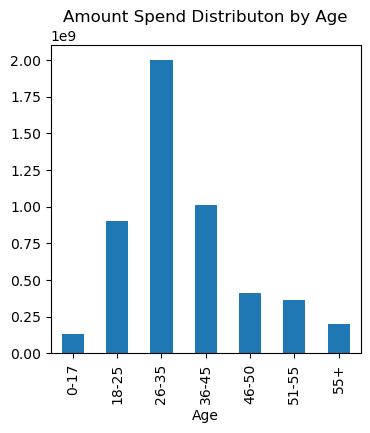

In [30]:
df.groupby('Age')['Purchase'].sum().plot(kind = 'bar',figsize = (4,4),title = 'Amount Spend Distributon by Age')

#### This correlates with Purchase by Each Age Category

#### Avg Amount Spend by each Age Category

<Axes: title={'center': 'Avg Amount Spend per Product Distributon by Age'}, ylabel='Purchase'>

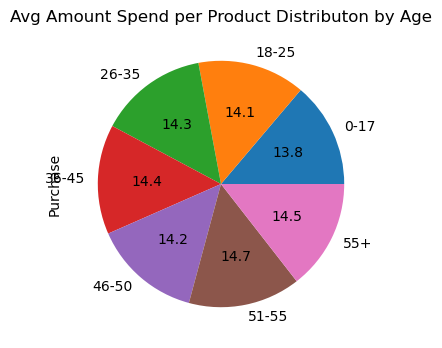

In [31]:
df.groupby('Age')['Purchase'].mean().plot(kind = 'pie',autopct = '%.1f' ,figsize = (4,4),title = 'Avg Amount Spend per Product Distributon by Age')

#### Every Age Category almost spends Same Amount per Product range but 51-55 spends most than the others.

### Analysing Marital Status

<Axes: ylabel='User_ID'>

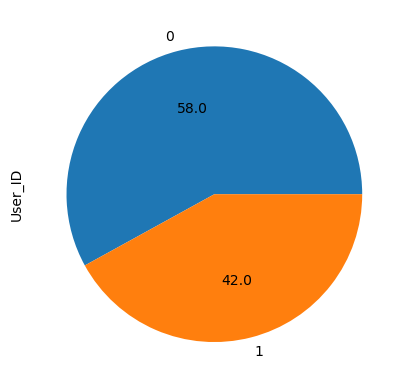

In [32]:
df.groupby('Marital_Status')['User_ID'].nunique().plot.pie(autopct = '%.1f')

#### 58% of the Customers(Unique) are unmarried(or something else) and 40% are married

<Axes: title={'center': 'Purchase Distribution by Marital Status'}, ylabel='Purchase'>

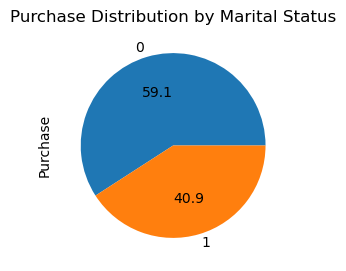

In [33]:
df.groupby(by = 'Marital_Status')['Purchase'].size().plot.pie(autopct ='%.1f',figsize = (3,3),title = 'Purchase Distribution by Marital Status')

#### Unmarried are spending more than married ones.

#### Avg Amount Spend by Marital Status

<Axes: title={'center': 'Avg Amount Spend by Marital Status'}, ylabel='Purchase'>

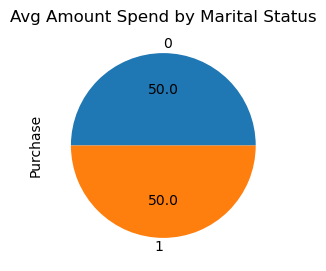

In [34]:
df.groupby(by = 'Marital_Status')['Purchase'].mean().plot.pie(autopct ='%.1f',figsize = (3,3),title = 'Avg Amount Spend by Marital Status')